# Clasificación de tumores benignos y malignos

## EDA (Analisis Exploratorio de Datos)

Para este ejercicio de aprendizaje sobre tecnicas de aprendizaje supervizado se utilizarán los siguientes datos: https://www.kaggle.com/code/gargmanish/basic-machine-learning-with-cancer/data
Este conjunto de datos contiene información sobre caracteristicas las de tumores detectados en pacientes que fueron diagnosticados como malignos o benignos. A continuación se importan las librerias que se usarán en la actividad. 

In [1]:
# here we will import the libraries used for machine learning

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import numpy as np
import random
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
import plotly.express as px
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from plotnine import * # incluye funciones de ggplot
from sklearn.svm import SVC # support vector machine
from sklearn.model_selection import cross_val_score # validacion cruzada
from sklearn.model_selection import GridSearchCV # grid
from sklearn.pipeline import make_pipeline
import mglearn
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, confusion_matrix


A contunuación importamos los datos usando la función read_csv de la librería pandas

In [2]:
data = pd.read_csv(".\data.csv",header=0)

Reemplazamos las etiquetas desde strings a numeros: 1 = Maligno; 0 = Beningno

In [3]:
data.diagnosis = data.diagnosis.replace({"M":1, "B": 0})

A continuación revisamos la estructura del dataframe y de las variables que contiene

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Contamos los valores perdidos para cada variable

In [5]:
pd.DataFrame(data.isnull().sum()).transpose()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,569


Se puede observar que las variables no presentan valores perdidos a excepción de la ultima columna, la cual será excluida de los análisis

Considerando que el interés en este ejercicio es clasificar correctamente los diagnosticos de una base datos, a continuación visualizamos los diagnosticos.

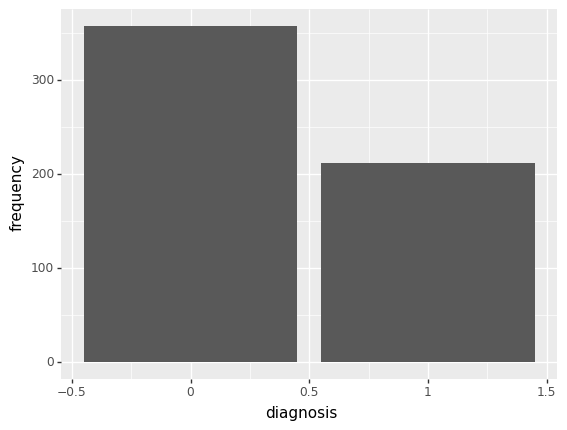

<ggplot: (115227946888)>

In [6]:
a = (data
                       .groupby("diagnosis")
                       .agg(frequency=("diagnosis", "count"))
                       .reset_index())

(ggplot(a) +
  geom_bar(aes(x = "diagnosis", y = "frequency"), stat = 'identity'))


Se puede observar que la mayoría de diagnosticos son de tumores benignos y los malignos se presentan en una menor frecuencia. A continuación examinamos la distribución de los diagnosticos de acuerdo con otras variables de la base de datos.

Considerando que se tiene un número elevado de variables que registran información sobre los tumores, procedemos a examinar si se pueden agrupar teniendo en cuenta sus correlaciones.

<AxesSubplot: >

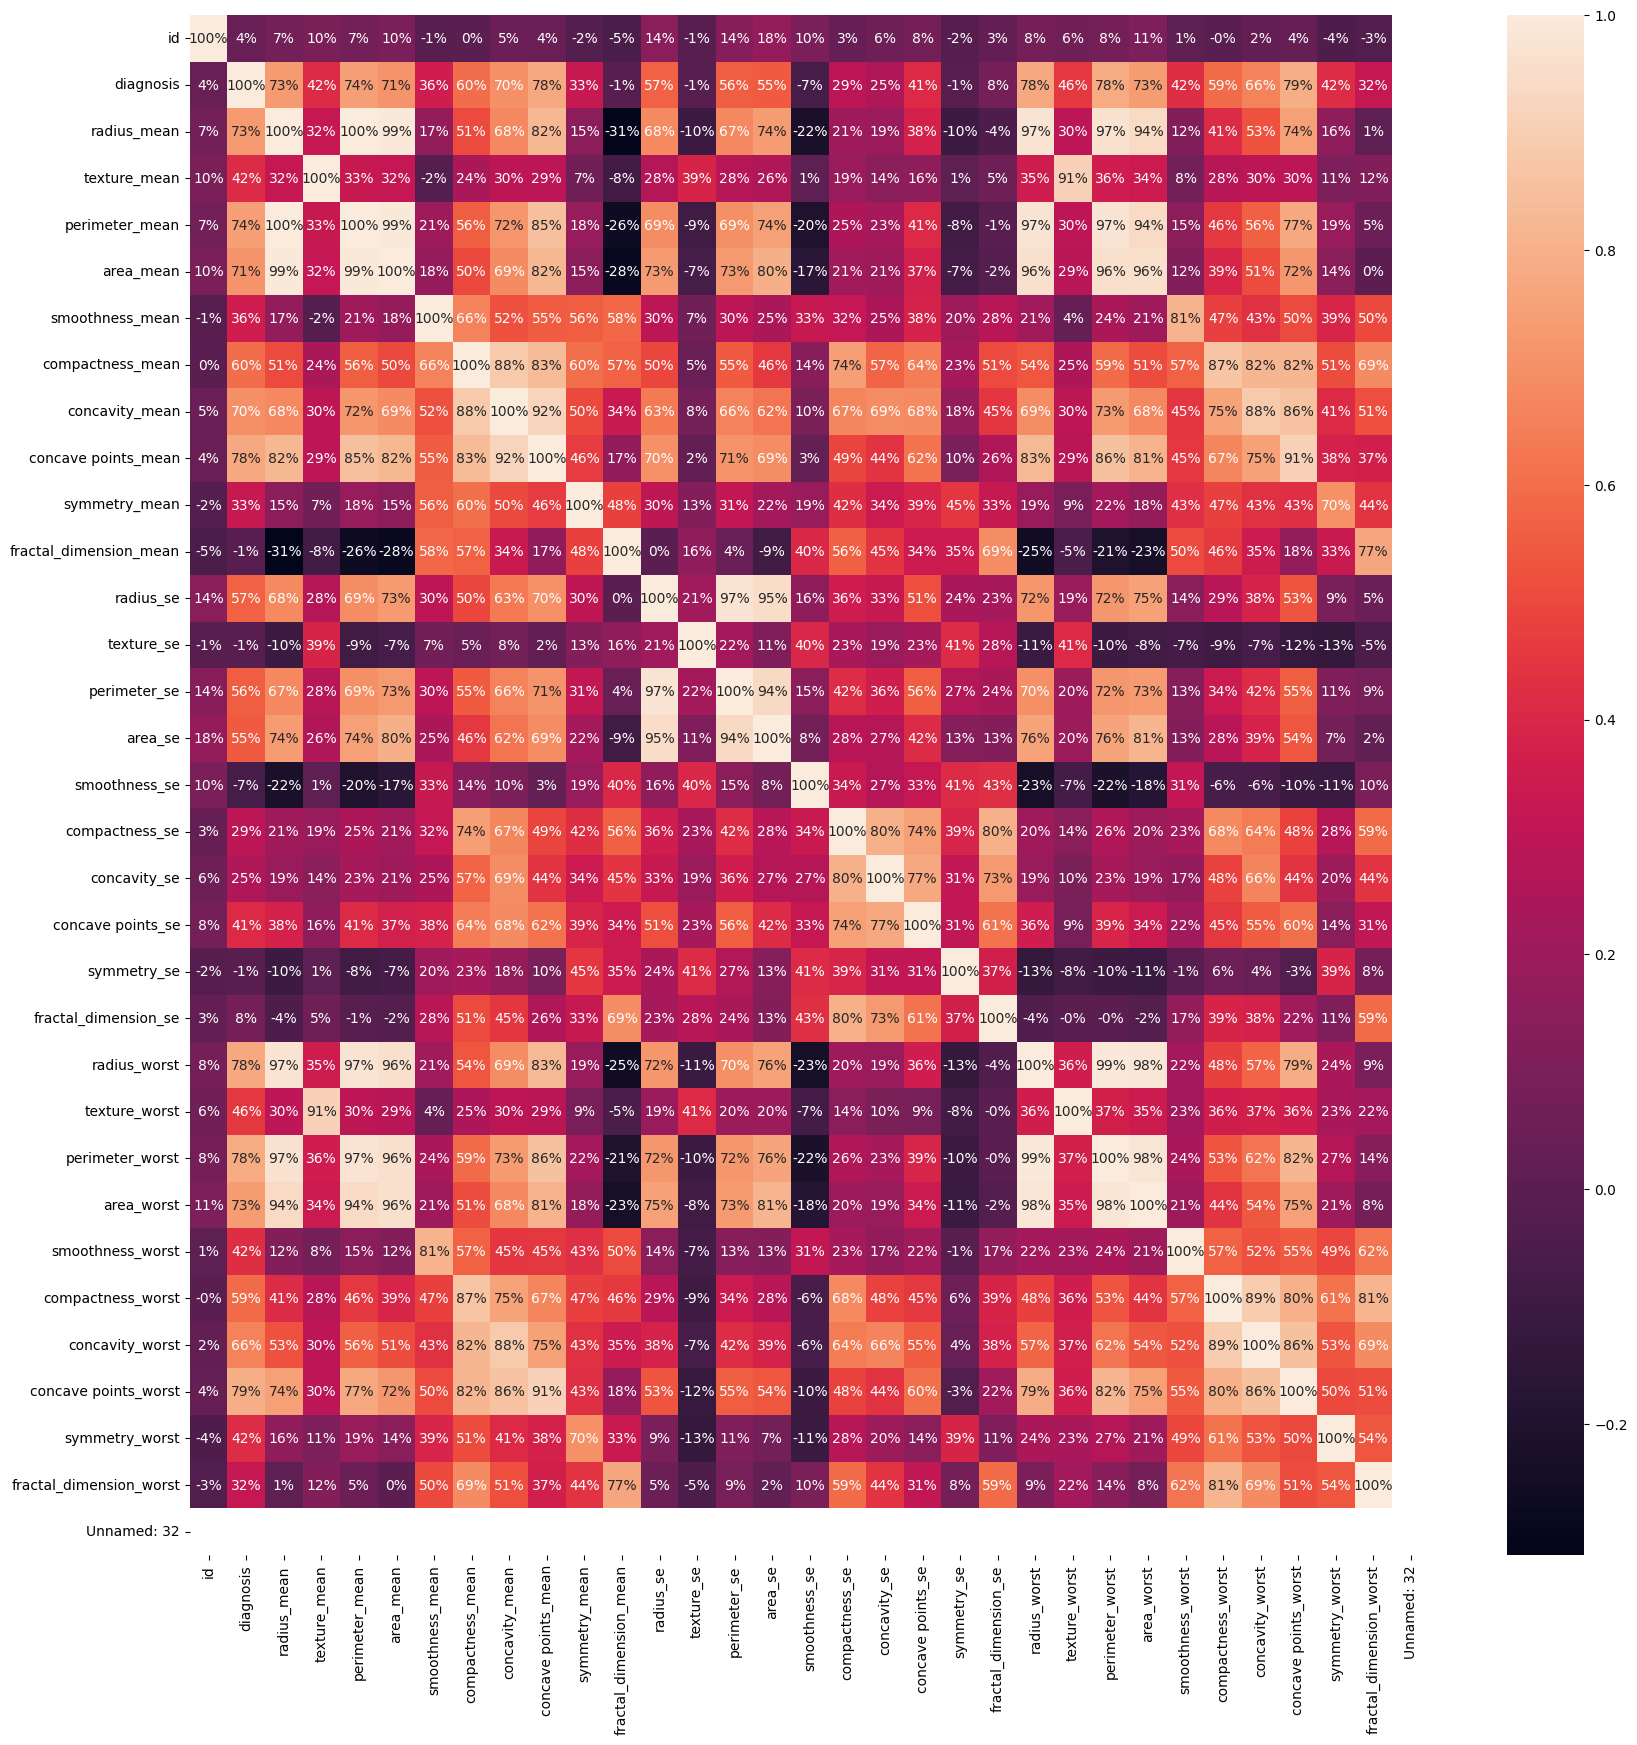

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,fmt='.0%')

A partir de la matriz de correlacion se observa que hay grupos de variables que se relacionan entre sí. Por ejemplo, las variables radio, perimetro y area tienen una fuerte correlacion entre ellas.

c:\Python_envs\dash_venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

c:\Python_envs\dash_venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



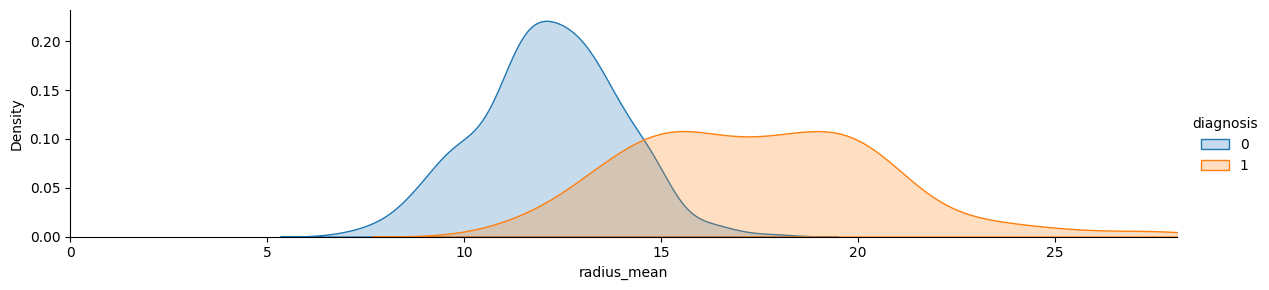

c:\Python_envs\dash_venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

c:\Python_envs\dash_venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



(10.0, 40.0)

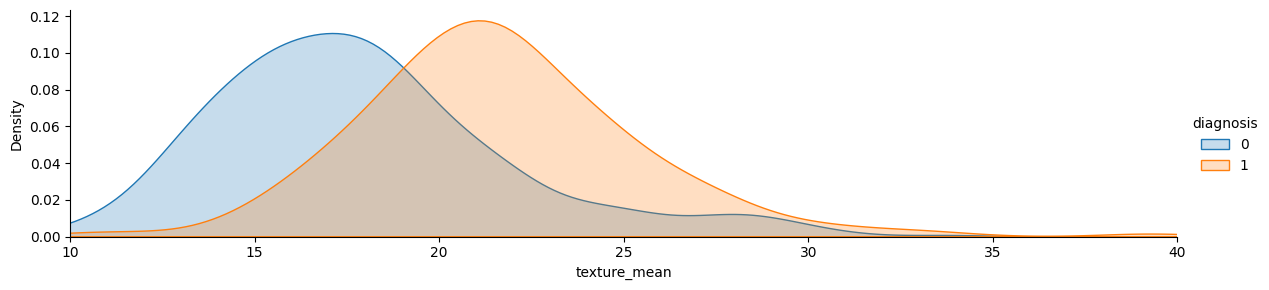

In [8]:
facet = sns.FacetGrid(data, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'radius_mean',shade= True)
facet.set(xlim=(0, data['radius_mean'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(data, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'texture_mean',shade= True)
facet.set(xlim=(0, data['texture_mean'].max()))
facet.add_legend() 
plt.xlim(10,40)


Los tumores malignos, presentan un radio promedio mayor en comparación con los tumores malignos. Mientras que con respecto a la textura (desviación estándar de los valores de la escala de grises), los tumores malignos también muestran una puntuación promedio más alta, que los tumores benignos.

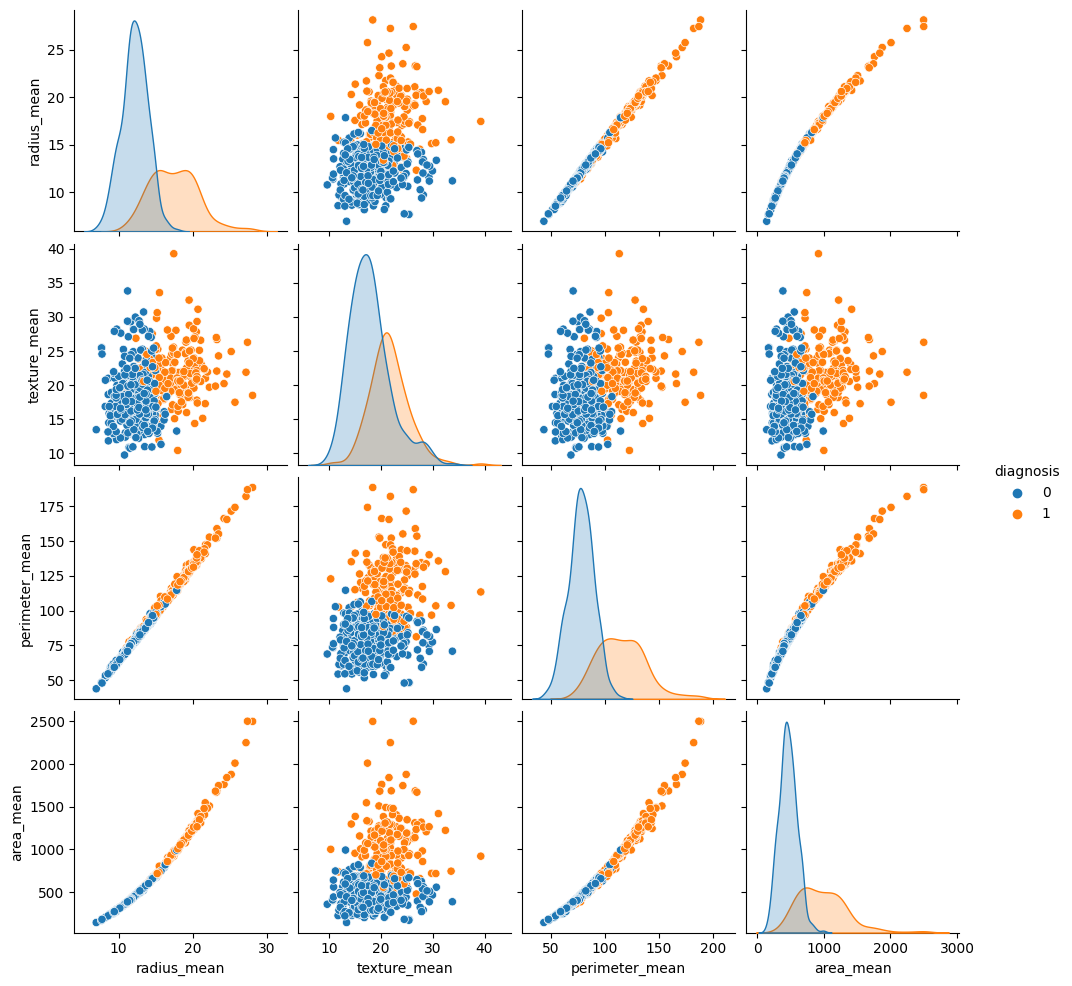

In [9]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

De acuerdo con los diagramas de densidad, se aprecia que las variables que mejor permiten diferenciar el tipo de tumor, son el perimetro, el area y el radio, ya que en la variable textura, ambos grupos exhiben un alto solapamiento.

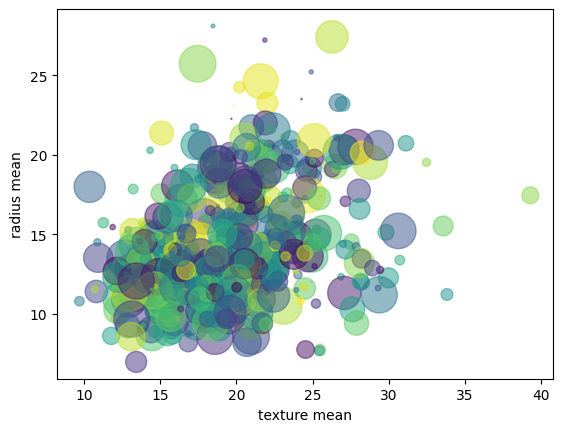

In [10]:
size = len(data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.5)

## Componentes principales

A continuación seleccionamos las variables cuantitativas para reducir la dimensionalidad del dataset

In [11]:
samples=data.iloc[:,2:32] # excluimos la variable de indentificación y la de diagnostico

A continuación escalamos las variables

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # el reescalador mixmax

scaler.fit(samples)
samples_scaled = pd.DataFrame(scaler.transform(samples),columns=samples.columns)
samples_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Ahora examinamos los valores propios para determinar el numero de componentes que debemos extraer

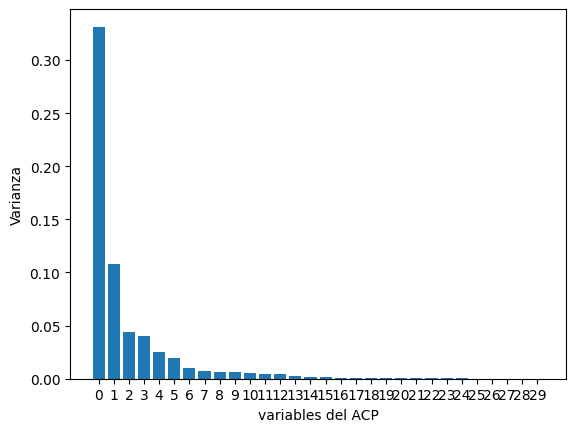

In [13]:

# creamos el modelo y ajustamos
model = PCA()
model.fit(samples_scaled)

# crear un rango que enumere las característica del ACP
caract = range(model.n_components_)

# grafiquemos la varianza explicada del modelo ACP
plt.bar(caract,model.explained_variance_)
plt.xticks(caract)
plt.ylabel('Varianza')
plt.xlabel('variables del ACP')
plt.show()

Analizando la varianza explicada por cada componente, parece suficiente extraer cuatro componentes

In [14]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(samples_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2','PC 3','PC 4'])
principalDf

,PC 1,PC 2,PC 3,PC 4
0,1.387021,0.426895,-0.541702,0.048483
1,0.462308,-0.556947,-0.205176,-0.042829
2,0.954621,-0.109701,-0.147848,-0.001068
3,1.000816,1.525089,-0.053271,-0.207915
4,0.626828,-0.302471,-0.409337,0.238812
...,...,...,...,...
564,1.002840,-0.474785,-0.100041,0.272994
565,0.620757,-0.517200,0.400361,0.182443
566,0.226311,-0.287946,0.315224,-0.011747
567,1.677834,0.335946,0.296116,-0.156305


In [15]:
pca.explained_variance_ratio_.sum() # varianza explicada

0.839068798465945

La varianza total explicada por las cuatro componentes es 83.90% lo cual significa que hubo poca perdida de información si se tiene en cuenta que se redujeron más de 20 dimensiones de la base de datos.

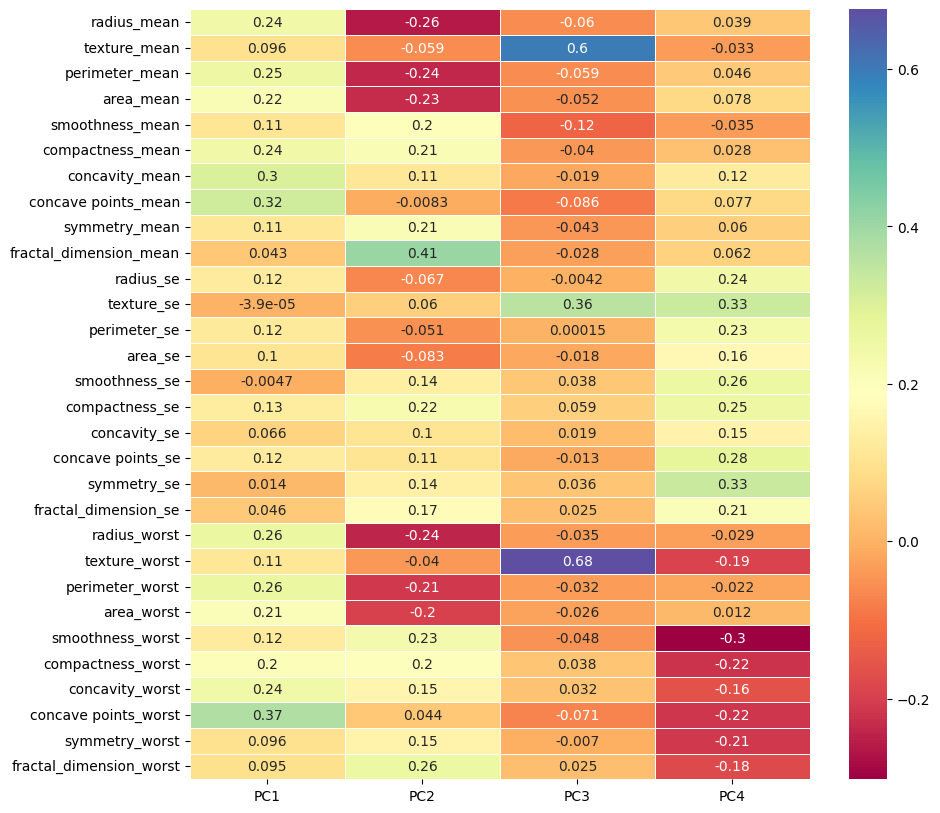

In [16]:
x = pd.DataFrame(
    data=np.transpose(pca.components_),
    columns=["PC1","PC2","PC3","PC4"],
    index=samples.columns
)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(x, annot=True, cmap='Spectral', linewidths=.5)
plt.show()

Examinando la matriz de cargas se puede observar que en el componente 1 las variables con mayor aporte de información son concave points_worst y concave points_means. En la segunda componente las variables con mayor aporte son fractal dimension_mean, fractal dimension_mean y radius_mean. La tercera componente es altamente representada por la información de las variables texture_worst, texture_mean y texture_se. Por su parte en la cuarta componente las variables con mayores cargas son texture_se, symmetry_se y smoothness_worst.

## Análisis de clasificación

Un  aspecto importante de los análisis de clasificación es contar con un conjunto de datos que nos permitan evaluar el score del modelo. Para ello se dividirán los datos en entrenamiento y testeo usando la función train_test_split. En este caso se tuvo en cuenta el diagnostico para realizar el split de manera estratificada y así garantizar que las dos muestras tengan observaciones con ambos tipos de diagnostico.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2:-1], data.diagnosis, random_state=0)
print("Size of training set: {} size of validation set: {}".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 426 size of validation set: 143


### Maquina de soporte vectorial (SVM)

A continuación usamos maquina de soporte vectorial (SVM) como metodo de clasificación. Usaremos inicialmente los valores 1, 10, 100, 1000, 10000 y 100000 para Gamma y 0.00001, 0.0001, 0.001, 0.01, 0.1 y 1 para C para evaluar diferentes modelos SVM y elegir el que tenga mejor score. Para optimizar los procesos de computo se realizarán los análisis de clasificación usando pipelines.

In [18]:
param_grid = {'svm__C': [1, 10, 100, 1000, 10000, 100000], 
              'svm__gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("PCA", PCA(n_components=4)), ("svm", SVC())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.97
Test set score: 0.958
Best parameters: {'svm__C': 100, 'svm__gamma': 0.01}


Se puede observar que el modelo es capaz de clasificar correctamente 96% de los datos de testeo. Siendo SVM más eficiente cuando gamma = 0.01 y C = 100.

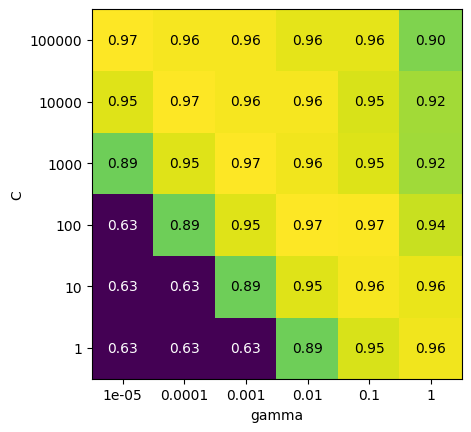

In [19]:
results = pd.DataFrame(grid.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, 
                      xlabel='gamma', 
                      xticklabels=param_grid['svm__gamma'], 
                      ylabel='C', 
                      yticklabels=param_grid['svm__C'], 
                      cmap="viridis");

En el mapa de calor se observan los scores que se obtiene al usar SVM variando cada uno de los parametros. Considerando que las zonas iluminadas se encuentran en el centro del mapa no parece necesario ajustar los valores de gamma y C.

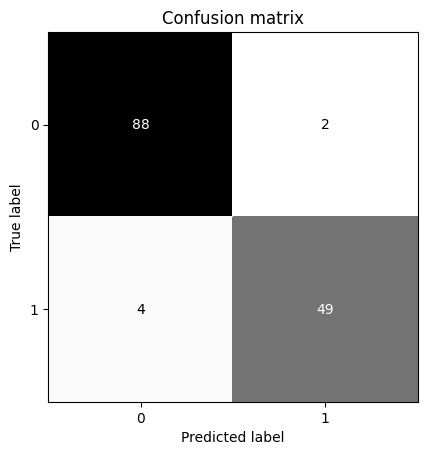

In [20]:
pred=grid.predict(X_test)
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label',
                                     ylabel='True label', 
                                     xticklabels=[0,1],
                                     yticklabels=[0,1],
                                     cmap=plt.cm.gray_r, 
                                     fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

Una vez seleccionado el mejor modelo, se evalúan examinan los casos clasificados correctamente. Se observa que de los 53 casos con cancer detectó 49 y los 90 casos sin cancer detectó 88.

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, grid.decision_function(X_test))
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=500, height=500)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

Una vez se observan los casos clasificados correctamente, es necesario examinar la curva ROC la cual muestra la relación entre las clasificaciones correctas e incorrectas. Asimismo, el AUC es un valor que oscila entre 0 y 1. Valores cercanos a 1 indican mayor calidad del modelo. En este caso el AUC de 0.996 muestra que el modelo resulta bastante bueno.

### Modelo de regresión logística

Ya se evaluó la capacidad de clasificar de SVM siendo esta de 96% para los datos de testeo. A continuación se realiza el mismo procedimiento, pero implementendo modelos de regresión logística para determinar si este clasifica mejor que SVM.

In [22]:
param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("PCA", PCA(n_components=4)), ("logisticregression", LogisticRegression())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.96
Test set score: 0.965
Best parameters: {'logisticregression__C': 10}


Los resultados muestran que este modelo clasifica correctamente 97% de los datos de testeo, 1% más que el modelo SVM.

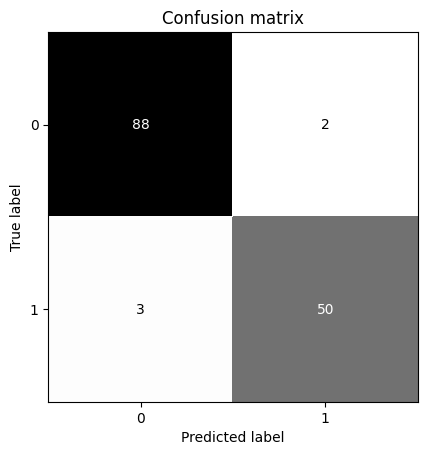

In [23]:
pred=grid.predict(X_test)
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label',
                                     ylabel='True label', 
                                     xticklabels=[0,1],
                                     yticklabels=[0,1],
                                     cmap=plt.cm.gray_r, 
                                     fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

La matriz de confusión muestra que el modelo logístico solo tuvo 3 falsos negativos y 2 falsos positivos.

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, grid.decision_function(X_test))
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=500, height=500)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

El AUC del modelo logístico muestra ser superior al de SVM.

In [25]:
random.seed(10)
param_grid = {'Gradient_boosting__n_estimators': [10, 20, 30, 40, 50, 55, 60, 65, 80]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("PCA", PCA(n_components=4)), ("Gradient_boosting", xgb.XGBClassifier(objective="binary:logistic", booster='gblinear', learning_rate =0.1, eval_metric="auc"))])

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.97
Test set score: 0.958
Best parameters: {'Gradient_boosting__n_estimators': 60}


Al igual que el modelo de SVM, este modelo clasifica correctamente el 96% de los datos de testeo.

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=500, height=500)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

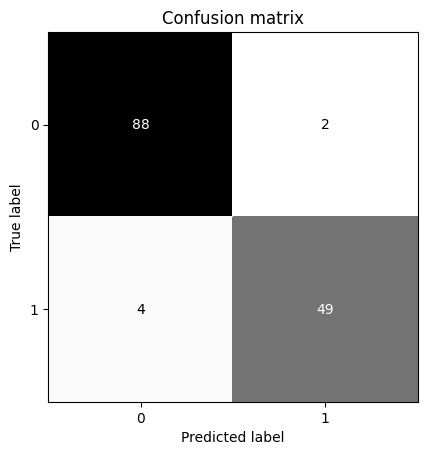

In [27]:
pred=grid.predict(X_test)
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label',
                                     ylabel='True label', 
                                     xticklabels=[0,1],
                                     yticklabels=[0,1],
                                     cmap=plt.cm.gray_r, 
                                     fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

La matriz de confusión muestra que el modelo XGB solo tuvo 4 falsos negativos (una más que el modelo logístico) y 2 falsos positivos.

In [28]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ("PCA", PCA(n_components=4)), ('classifier', RandomForestClassifier())])

param_grid = [{'classifier': [RandomForestClassifier(n_estimators=100)],

               'preprocessing': [None], 'classifier__max_features': [1, 2, 3, 4]}]

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

print("Test-set score: {:.3f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': RandomForestClassifier(max_features=1), 'classifier__max_features': 1, 'preprocessing': None}

Best cross-validation score: 0.95
Test-set score: 0.951


Al ensayar con el Random Forest model, este clasifica correctamente el 95% de los datos de testeo (porcentaje menor que los modelos previos).

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=500, height=500)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

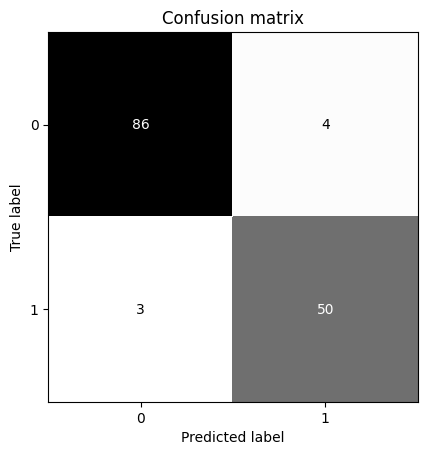

In [30]:
pred=grid.predict(X_test)
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label',
                                     ylabel='True label', 
                                     xticklabels=[0,1],
                                     yticklabels=[0,1],
                                     cmap=plt.cm.gray_r, 
                                     fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

La matriz de confusión del Random Forest model muestra 4 falsos negativos y 3 falsos positivos (mas que el XGB, M. Logistico y SVM).